Output spikes were not detected
Number of inputs: 25, Factor: 0.5, FAILED!



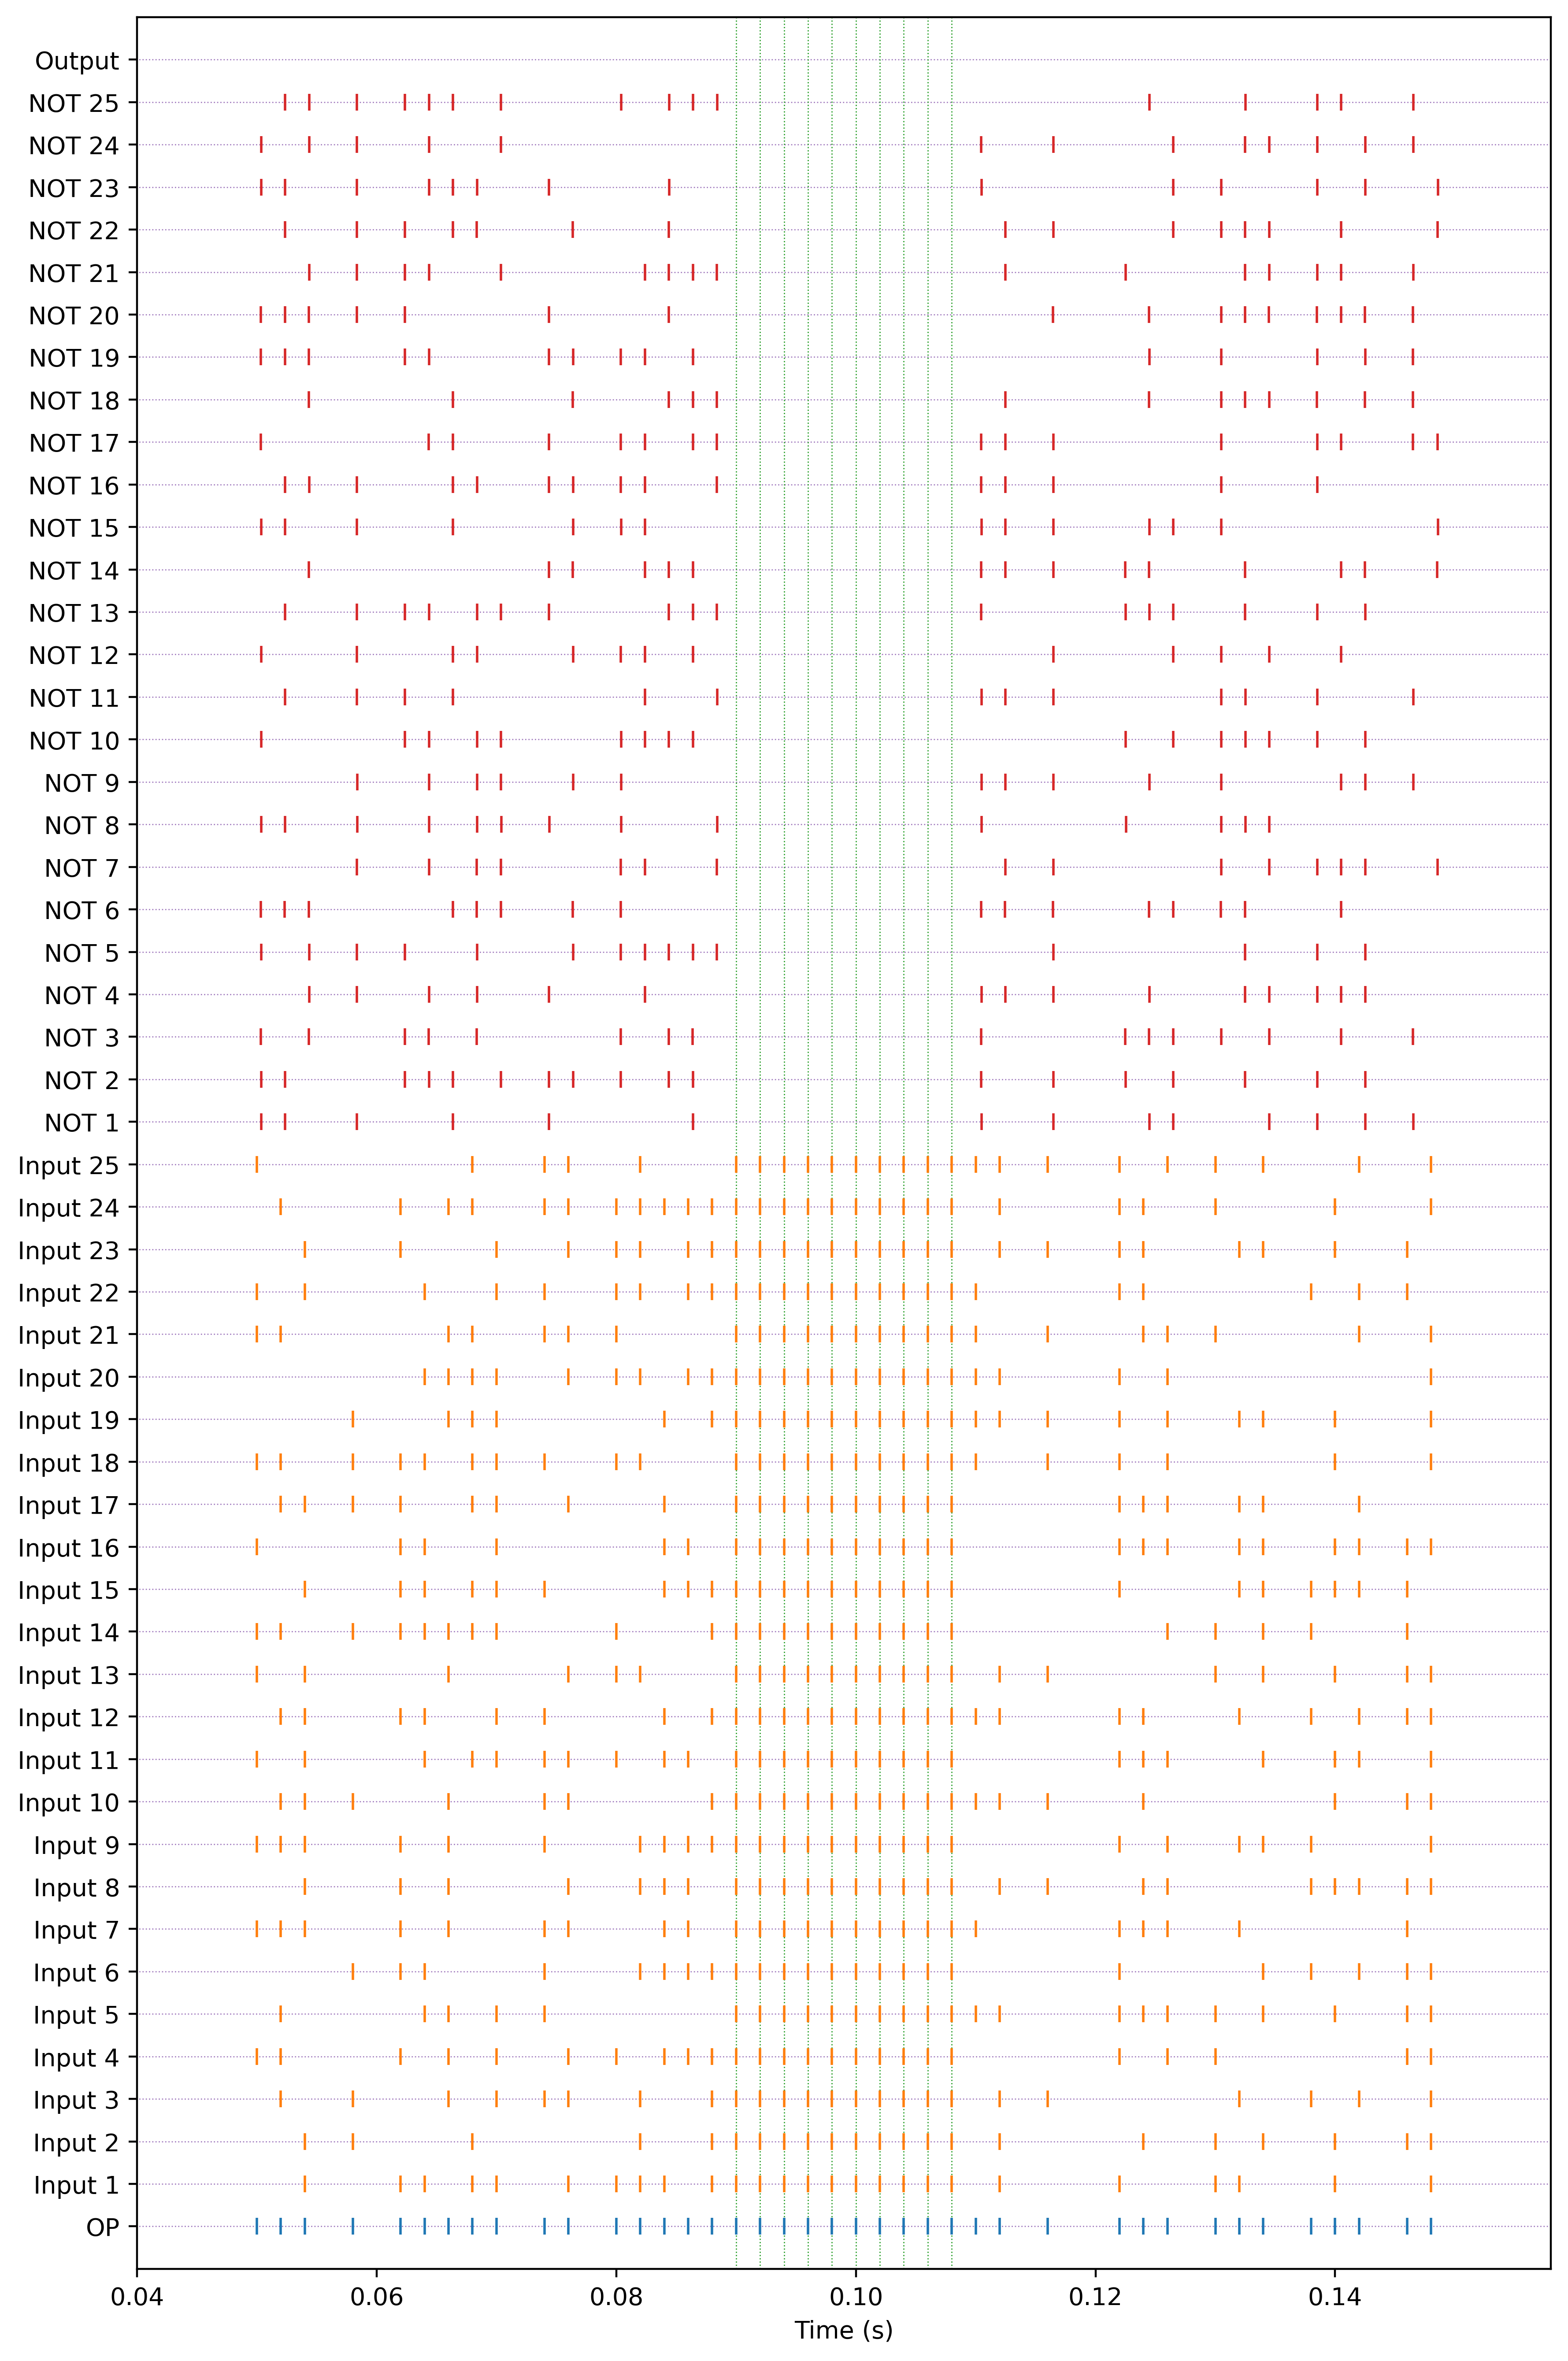

In [17]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

filename = "inh_and_25inputs_factor0.5_1"
folder = "results_AND/"

with open(folder + filename + '.pickle', "rb") as handle:
        sg_times, evts_n = pickle.load(handle)

n_inputs = 25
factor = 0.5
show_lines = True
show_NOT = True

plt.rcParams['figure.dpi'] = 400
plt.rcParams['figure.figsize'] = [9, 2.5 * (n_inputs + 2) / 5]

intersection = sg_times[0]
for i in range(n_inputs):
    intersection = np.intersect1d(intersection, sg_times[i + 1])

# Lines
if show_lines:
    if not show_NOT:
        plt.hlines(range(-1, n_inputs + 3), 0, sg_times[0][-3] + 0.005 / factor, linestyles='dotted', linewidth=0.50, color='indigo', alpha=0.5)
    else:
        plt.hlines(range(-1, n_inputs * 2 + 3), 0, sg_times[0][-3] + 0.005 / factor, linestyles='dotted', linewidth=0.50, color='indigo', alpha=0.5)

    plt.vlines(intersection, ymin=0, ymax=n_inputs * 2 + 3, linestyles='dotted', linewidth=0.50, color='tab:green', alpha=1)
# ------

plt.plot(sg_times[0], [1] * len(sg_times[0]), color='tab:blue', linestyle = 'None', marker='|', markersize=7)
for i in range(1, n_inputs + 1):
    plt.plot(sg_times[i], [i+1] * len(sg_times[i]), color='tab:orange', linestyle = 'None', marker='|', markersize=7)
plt.xlabel('Time (s)')
if not show_NOT:
    plt.yticks(range(1, n_inputs + 3))
    plt.gca().set_yticklabels(["OP"] + ["Input " + str(i) for i in range(1, n_inputs + 1)] + ["Output"])
    plt.ylim([0, n_inputs + 3])
else:
    plt.yticks(range(1, n_inputs * 2 + 3))
    plt.gca().set_yticklabels(["OP"] + ["Input " + str(i) for i in range(1, n_inputs + 1)] + ["NOT " + str(i) for i in range(1, n_inputs + 1)] + ["Output"])
    plt.ylim([0, n_inputs * 2 + 3])
plt.xlim([0.05 - 0.005 / factor, sg_times[0][-3] + 0.005 / factor])

for i in range(2, n_inputs + 2):
    evts_not = np.array([evt for evt in evts_n if evt[1] == i])
    if len(evts_not) != 0:
        plt.plot(evts_not[:,0], [n_inputs + i] * len(evts_not[:,0]), color='tab:red', linestyle = 'None', marker='|', markersize=7)

evts_nor = np.array([evt for evt in evts_n if evt[1] == n_inputs + 2])
if len(evts_nor) == 0:
    print("Output spikes were not detected")
else:
    if not show_NOT:
        plt.plot(evts_nor[:,0], [n_inputs + 2] * len(evts_nor[:,0]), color='tab:green', linestyle = 'None', marker='|', markersize=7)
    else:
        plt.plot(evts_nor[:,0], [n_inputs * 2 + 2] * len(evts_nor[:,0]), color='tab:green', linestyle = 'None', marker='|', markersize=7)

if len(evts_nor) != 0 and len(evts_nor[:,0]) == len(intersection):
    print("Number of inputs: " + str(n_inputs) + ", Factor: " + str(factor) + ", OK!\n")
else:
    print("Number of inputs: " + str(n_inputs) + ", Factor: " + str(factor) + ", FAILED!\n")

plt.tight_layout()
plt.savefig(folder + filename + '.png', transparent=False, facecolor='white', edgecolor='black')